# Projeto 2 - Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Carregando o dataset

df = pd.read_csv('dataset.csv')

In [3]:
# Amostra dos dados (primeiras 10 linhas)

df.head(10)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
5,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800
7,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000


In [4]:
# Shape (número de linhas, número de colunas)

df.shape

(9700, 11)

In [5]:
# Nome das colunas e tipo de dados de cada coluna

df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [6]:
# Reusmo estatístico da coluna "Valor_Venda"

df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [7]:
# Verificando registros duplicados

df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [8]:
# Verificando se há registros nulos

df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Pergunta de Negócio 1

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [9]:
# Filtramos o dataframe com os registros da categoria Office Supplies.
# Agrupamos por cidade e calculamos o total de vendas de cada cidade
# Encontramos a cidade com o maior valor de venda

cidade_maior_venda = df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().idxmax()

print("A cidade com maior valor de venda da categoria Office Supplies é: ", cidade_maior_venda)

A cidade com maior valor de venda da categoria Office Supplies é:  New York City


### Pergunta de Negócio 2

Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

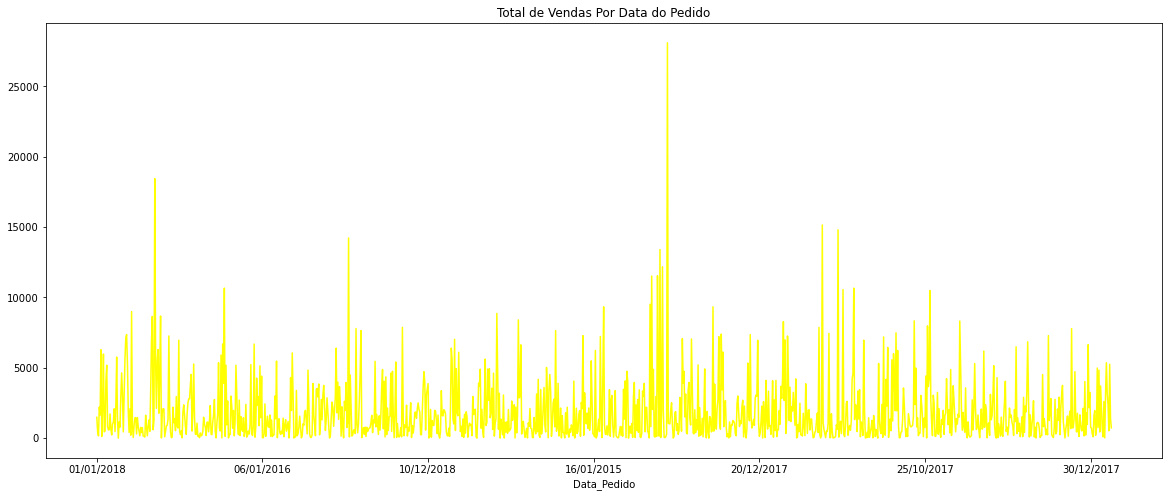

In [10]:
# Calculamos o total de vendas para cada data do pedido e criamos o gráfico

plt.figure(figsize = (20, 8))
pergunta_2 = df.groupby('Data_Pedido')['Valor_Venda'].sum() \
                                        .plot(x = 'Data_Pedido' , y = 'Valor_Venda', color = 'yellow')

plt.title('Total de Vendas Por Data do Pedido')
plt.show()                             

### Pergunta de Negócio 3

Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras

In [11]:
# Todos os estados e o total de vendas por estado

df.groupby('Estado')['Valor_Venda'].sum()

Estado
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11673.8300
California              442927.0975
Colorado                 31841.5980
Connecticut              13366.7370
Delaware                 26452.5890
District of Columbia      2865.0200
Florida                  88043.7000
Georgia                  48083.1600
Idaho                     4292.5160
Illinois                 78109.9270
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36409.5800
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            27363.2640
Michigan                 76081.1740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7194.9500
Nevada                   16729.1020
New Hampshire        

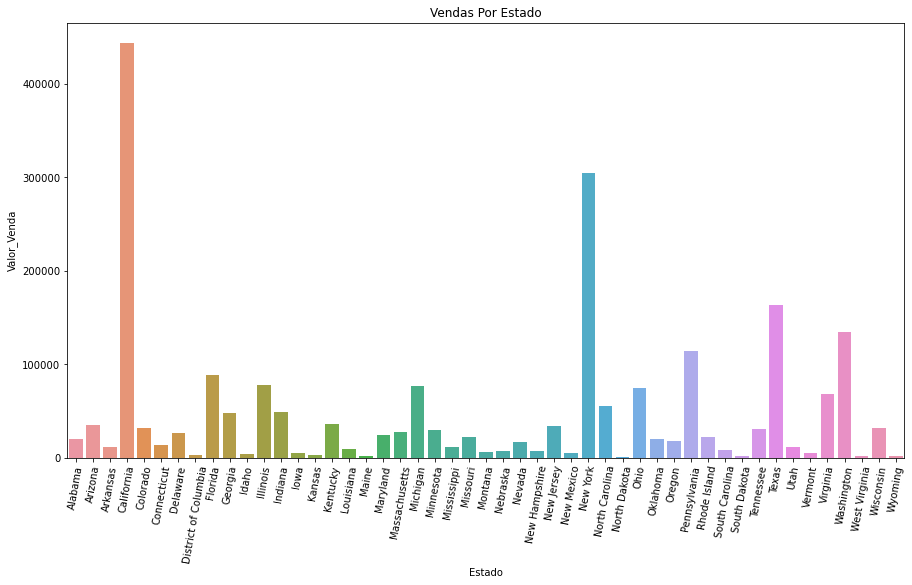

In [12]:
# Agrupamos por estado e calculamos o total de vendas
pergunta_3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Criando gráfico
plt.figure(figsize = (15, 8))
sns.barplot(data = pergunta_3, 
           y = 'Valor_Venda',
           x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

### Pergunta de Negócio 4

Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [13]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando apenas os primeiros 10 registros

pergunta_4 = df.groupby('Cidade')['Valor_Venda'].sum() \
                                                .reset_index() \
                                                .sort_values(by = 'Valor_Venda', ascending = False) \
                                                .head(10)

pergunta_4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


<function matplotlib.pyplot.show(close=None, block=None)>

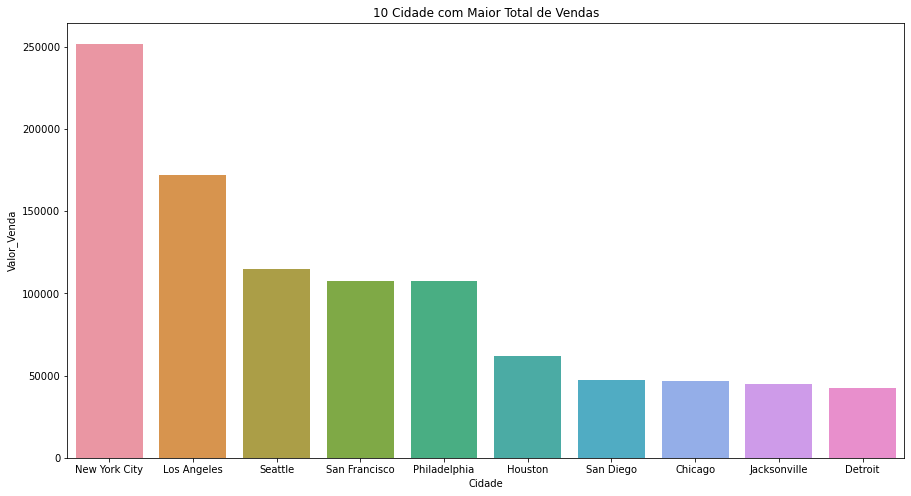

In [14]:
# Criando gráfico 

plt.figure(figsize = (15, 8))
sns.set_palette('coolwarm')
sns.barplot(data = pergunta_4,
           y = 'Valor_Venda',
           x = 'Cidade').set(title = '10 Cidade com Maior Total de Vendas')
plt.show

### Pergunta de Negócio 5

Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

In [15]:
# Agrupamos por segmento e calculamos o total de vendas

pergunta_5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)
pergunta_5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [16]:
# Criando função para converter os dados em valor absoluto

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

<function matplotlib.pyplot.show(close=None, block=None)>

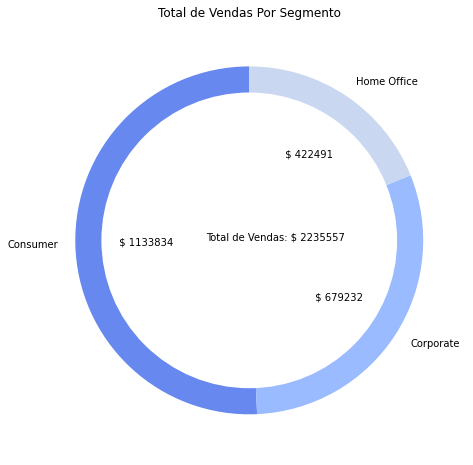

In [17]:
# Gráfico 

plt.figure(figsize = (15, 8))
plt.pie(pergunta_5['Valor_Venda'],
        labels = pergunta_5['Segmento'],
        autopct = autopct_format(pergunta_5['Valor_Venda']),
        startangle = 90)

# Cria um círculo branco no meio do gráfico

centre_circle = plt.Circle((0, 0), 0.85, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Cria anotações no gráfico e adiciona título

plt.annotate(text = 'Total de Vendas: $ ' + str(int(sum(pergunta_5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show

### Pergunta de Negócio 6

Qual o Total de Vendas Por Segmento e Por Ano?

In [18]:
# Converte a coluna de data do tipo object para o tipo datetime
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)
df.head()


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [19]:
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [20]:
# Extrai apenas o ano da coluna "Data_Pedido" e cria uma nova coluna

df['Ano'] = df['Data_Pedido'].dt.year
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [21]:
# Calcula o total de vendas por segmento e por ano
pergunta_6 = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
pergunta_6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

### Pergunta de Negócio 7
Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

In [22]:
# Cria uma nova coluna com base na regra definida
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.1)
df.head(10)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,0.1
6,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,2015,0.1
7,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,2015,0.1
8,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,2015,0.1
9,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,2015,0.1


In [23]:
df['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [24]:
print('457 vendas receberiam 15% de desconto')

457 vendas receberiam 15% de desconto


### Pergunta de Negócio 8

Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [25]:
# Cria uma coluna nova calculando o valor de venda menos o desconto

df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])

df.head(10)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120
5,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600,2015,0.1,43.97400
6,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800,2015,0.1,6.55200
7,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520,2015,0.1,816.43680
8,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040,2015,0.1,16.65360
9,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000,2015,0.1,103.41000


In [26]:
# Média das vendas antes do desconto de 15%
media_vendas_antes_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda'].mean()

# Média das vendas depois do desconto de 15%
media_vendas_depois_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Desconto'].mean()

In [27]:
print(" Média das vendas antes do desconto de 15%: ", round(media_vendas_antes_desconto, 2), "\n",
      "Média das vendas depois do desconto de 15%: ", round(media_vendas_depois_desconto, 2))

 Média das vendas antes do desconto de 15%:  2116.81 
 Média das vendas depois do desconto de 15%:  1799.29


### Pergunta de Negócio 9

Qual a Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de um gráfico de linha.

In [28]:
# Extrai apenas o mês da coluna "Data_Pedido" e cria uma nova coluna
df['Mes'] = df['Data_Pedido'].dt.month

df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [29]:
# Agrupa por ano, mês e segmento e calcula a média
pergunta_9 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.mean])
pergunta_9

mean
Ano  Mes Segmento               
2015 1   Consumer     146.736787
         Corporate    130.886769
         Home Office  329.855882
     2   Consumer     117.327926
         Corporate     69.235333
...                          ...
2018 11  Corporate    341.215278
         Home Office  247.519423
     12  Consumer     183.616244
         Corporate    153.167403
         Home Office  224.523983

[144 rows x 1 columns]

In [30]:
# Extrai os níveis
anos = pergunta_9.index.get_level_values(0)
meses = pergunta_9.index.get_level_values(1)
segmentos = pergunta_9.index.get_level_values(2)

<Figure size 1080x576 with 0 Axes>

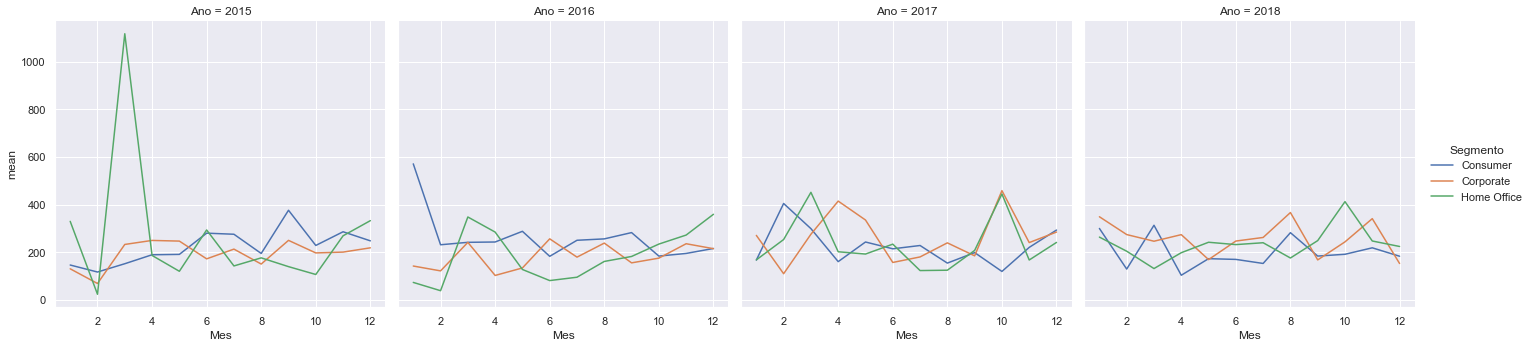

In [31]:
# Gráfico
plt.figure(figsize = (15, 8))
sns.set()
grafico = sns.relplot(kind = 'line',
                      data = pergunta_9,
                      y = 'mean',
                      x = meses,
                      hue = segmentos,
                      col = anos,
                      col_wrap = 4)

plt.show()

### Pergunta de Negócio 10

Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

Demonstre tudo através de um único gráfico.

In [32]:
# Agrupa por categoria e subcategoria, e calcula a soma somente para variáveis numéricas

pergunta_10 = df.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True) \
                                                       .sort_values('Valor_Venda', ascending = False) \
                                                       .head(12)
pergunta_10

Valor_Venda      Ano  Desconto  \
Categoria       SubCategoria                                   
Technology      Phones        325271.2940  1748496     90.15   
Furniture       Chairs        317919.6250  1201942     63.30   
Office Supplies Storage       216188.3620  1663791     84.75   
Furniture       Tables        202083.3600   627193     34.15   
Office Supplies Binders       194723.3810  2964618    149.10   
Technology      Machines      189238.6310   231912     13.65   
                Accessories   162791.3620  1504508     76.10   
                Copiers       146248.0940   133104      8.30   
Furniture       Bookcases     108045.0467   449734     23.50   
Office Supplies Appliances    104061.6930   915604     46.45   
Furniture       Furnishings    88862.7700  1865489     92.75   
Office Supplies Paper          76312.7640  2680255    132.90   

                              Valor_Venda_Desconto    Mes  
Categoria       SubCategoria                               
Technology      Phones                286990.85830   6649  
Furniture       Chairs                279816.75990   4834  
Office Supplies Storage               191433.27010   6548  
Furniture       Tables                176938.45555   2466  
Office Supplies Binders               169623.33495  11451  
Technology      Machines              162213.65840    897  
                Accessories           144162.61990   5982  
                Copiers               125379.85260    516  
Furniture       Bookcases              95035.86235   1706  
Office Supplies Appliances             91938.64420   3583  
Furniture       Furnishings            79694.54640   7301  
Office Supplies Paper                  68681.48760  10404

In [33]:
# Converte a coluna "Valor_Venda" em número inteiro e classifica por categoria
pergunta_10 = pergunta_10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()
pergunta_10


,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [34]:
# Cria outro dataframe somente com os totais por categoria

pergunta_10_categorias = pergunta_10.groupby('Categoria').sum(numeric_only = True).reset_index()
pergunta_10_categorias

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [35]:
# Lista de cores para categorias 
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Lista de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

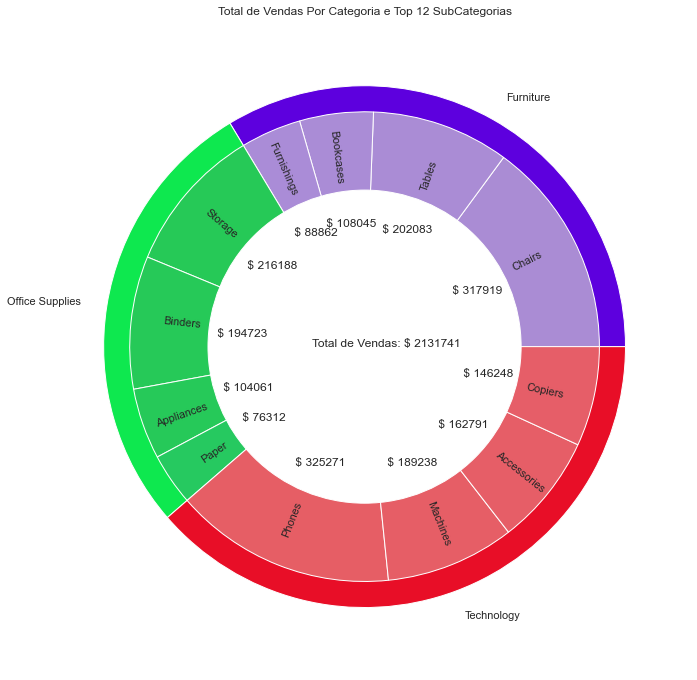

In [37]:
# Gráfico

# Tamanho da figura

fig, ax = plt.subplots(figsize = (18, 12))

# Gráfico das categorias
p1 = ax.pie(pergunta_10_categorias['Valor_Venda'],
            radius = 1,
            labels = pergunta_10_categorias['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias

p2 = ax.pie(pergunta_10['Valor_Venda'],
            radius = 0.9,
            labels = pergunta_10['SubCategoria'],
            autopct = autopct_format(pergunta_10['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Cria um circulo branco no centro do gráfico

centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(pergunta_10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()